In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import quantstats as qs

from trading_lab.data.loaders import import_yahoo
from trading_lab.data.cleaners import clean_table
from trading_lab.indicators.indicators import add_sma
from trading_lab.strategies.strategies import sma_cross, rsi_cross
from trading_lab.backtest.portfolio import signal_to_pos
from trading_lab.backtest.engine import engine_sma, engine_rsi
from trading_lab.backtest.metrics import summary_stats
from trading_lab.backtest.visuals import visuals_sma_strat, visuals_rsi_strat

### **PIPELINE : Simple Moving Average**

Import Data (raw = False) --> Create Strategy --> Engine --> Metrics or Visuals 

In [78]:
# Params
ticker = 'AAPL'
start = '2020-01-01'
end = '2025-01-01'
fast_sma = 20
slow_sma = 50

In [79]:
df = import_yahoo(ticker=ticker, start=start, end=end, raw=False)
df

[*********************100%***********************]  1 of 1 completed

✅ AAPL data successfully imported


,adj close
Date,
2020-01-02,72.468269
2020-01-03,71.763710
2020-01-06,72.335564
2020-01-07,71.995354
2020-01-08,73.153503
...,...
2024-12-24,257.037476
2024-12-26,257.853790
2024-12-27,254.439224


In [80]:
df = sma_cross(df=df, fast_ma=fast_sma, slow_ma=slow_sma)

In [81]:
df

,adj close,sma_20,sma_50,signal
Date,,,,
2020-03-13,67.227592,70.774002,73.870382,0
2020-03-16,58.578972,69.773460,73.592596,0
2020-03-17,61.154701,68.973656,73.380416,0
2020-03-18,59.657635,68.043129,73.126857,0
2020-03-19,59.200539,67.129896,72.870961,0
...,...,...,...,...
2024-12-24,257.037476,245.184590,234.761245,0
2024-12-26,257.853790,246.377196,235.267495,0
2024-12-27,254.439224,247.405545,235.746622,0


In [82]:
res = engine_sma(ticker="AAPL", start='2020-01-01', end='2025-01-01', fast_sma=fast_sma, slow_sma=slow_sma)

[*********************100%***********************]  1 of 1 completed

✅ AAPL data successfully imported



/Users/marienrossi/Desktop/FE_EDHEC/Master Project/MasterProject_NewVersion/src/trading_lab/backtest/portfolio.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(0))


In [83]:
res

,pos,rets,eq_curve
Date,,,
2020-03-13,0,0.0000,NaN
2020-03-16,0,0.0000,1000.00
2020-03-17,0,0.0000,1000.00
2020-03-18,0,0.0000,1000.00
2020-03-19,0,0.0000,1000.00
...,...,...,...
2024-12-24,1,0.0115,2125.92
2024-12-26,1,0.0032,2132.67
2024-12-27,1,-0.0132,2104.43


In [84]:
stats = summary_stats(res['rets'])
stats

,Strategy
Annualized Return,0.1629
Annualized Volatility,0.2103
Sharpe Ratio,0.8226
Max Drawdown,0.2908
Win Rate,0.5353
Profit Factor,1.2011


In [86]:
qs.reports.metrics(res['rets'])

                     Strategy
-------------------  ----------
Start Period         2020-03-13
End Period           2024-12-31
Risk-Free Rate       0.0%
Time in Market       61.0%

Cumulative Return    106.25%
CAGR﹪               16.29%

Sharpe               0.82
Prob. Sharpe Ratio   96.48%
Sortino              1.23
Sortino/√2           0.87
Omega                1.2

Max Drawdown         -29.08%
Max DD Date          2023-03-01
Max DD Period Start  2022-01-04
Max DD Period End    2024-06-28
Longest DD Days      907

Gain/Pain Ratio      0.2
Gain/Pain (1M)       0.96

Payoff Ratio         1.04
Profit Factor        1.2
Common Sense Ratio   1.33
CPC Index            0.67
Tail Ratio           1.11
Outlier Win Ratio    6.48
Outlier Loss Ratio   3.09

MTD                  3.2%
3M                   3.55%
6M                   11.37%
YTD                  21.99%
1Y                   21.99%
3Y (ann.)            5.12%
5Y (ann.)            16.29%
10Y (ann.)           16.29%
All-time (ann.)      16.29

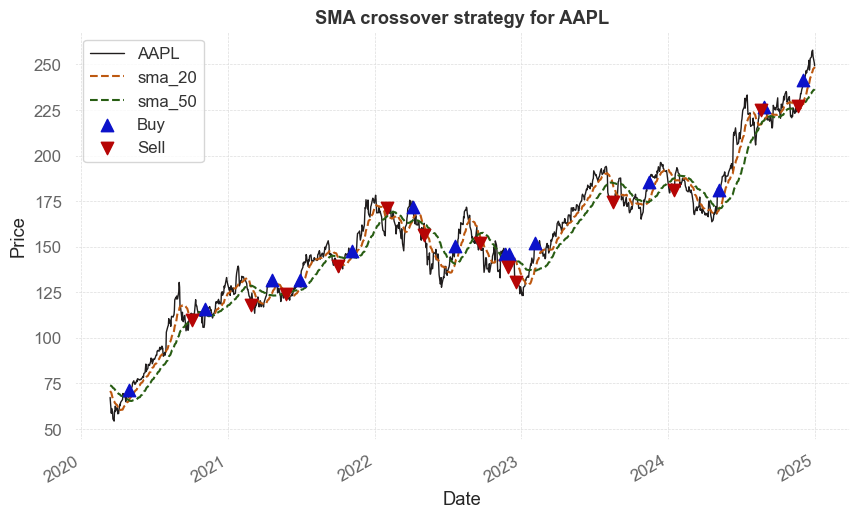

In [87]:
visuals_sma_strat(df, eq_curve=res["eq_curve"])

### **PIPELINE : Relative Strength Index**

In [7]:
# Params
ticker = 'AAPL'
start = '2010-01-01'
end = '2025-01-01'
length = 14

In [8]:
df = import_yahoo(ticker=ticker, start=start, end=end, raw=False)
df

[*********************100%***********************]  1 of 1 completed

✅ AAPL data successfully imported


,adj close
Date,
2010-01-04,6.418381
2010-01-05,6.429482
2010-01-06,6.327209
2010-01-07,6.315513
2010-01-08,6.357502
...,...
2024-12-24,257.037476
2024-12-26,257.853760
2024-12-27,254.439209


In [31]:
strat = rsi_cross(df, length)
strat

,adj close,RSI_14,signal
Date,,,
2010-02-12,6.009605,51.991541,0
2010-02-16,6.100180,56.881251,0
2010-02-17,6.074686,55.177712,0
2010-02-18,6.086082,55.814750,0
2010-02-19,6.048295,53.118967,0
...,...,...,...
2024-12-24,257.037476,75.750248,0
2024-12-26,257.853760,76.452850,0
2024-12-27,254.439209,67.626239,0


In [10]:
pos = signal_to_pos(strat)
pos

/Users/marienrossi/Desktop/FE_EDHEC/Master Project/MasterProject_NewVersion/src/trading_lab/backtest/portfolio.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(0))


Date
2010-01-25    0
2010-01-26    0
2010-01-27    0
2010-01-28    0
2010-01-29    0
             ..
2024-12-24    1
2024-12-26    1
2024-12-27    1
2024-12-30    1
2024-12-31    0
Name: signal, Length: 3760, dtype: int64

In [11]:
res = engine_rsi(ticker=ticker, start=start, end=end, length=length)
res

[*********************100%***********************]  1 of 1 completed

✅ AAPL data successfully imported



/Users/marienrossi/Desktop/FE_EDHEC/Master Project/MasterProject_NewVersion/src/trading_lab/backtest/portfolio.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(0))


,pos,rets,eq_curve
Date,,,
2010-01-25,0,0.0000,NaN
2010-01-26,0,0.0000,1000.00
2010-01-27,0,0.0000,1000.00
2010-01-28,0,0.0000,1000.00
2010-01-29,0,0.0000,1000.00
...,...,...,...
2024-12-24,1,0.0115,15783.63
2024-12-26,1,0.0032,15833.75
2024-12-27,1,-0.0132,15624.08


In [12]:
stats = summary_stats(res['rets'])
stats

,Strategy
Annualized Return,0.2007
Annualized Volatility,0.2145
Sharpe Ratio,0.9600
Max Drawdown,0.2836
Win Rate,0.5358
Profit Factor,1.2231


In [13]:
df

,adj close,RSI_14,signal
Date,,,
2010-01-25,6.090282,39.489205,0
2010-01-26,6.176356,44.144041,0
2010-01-27,6.234538,47.106033,0
2010-01-28,5.976916,37.598594,0
2010-01-29,5.760080,31.783911,0
...,...,...,...
2024-12-24,257.037476,75.750248,0
2024-12-26,257.853760,76.452850,0
2024-12-27,254.439209,67.626239,0


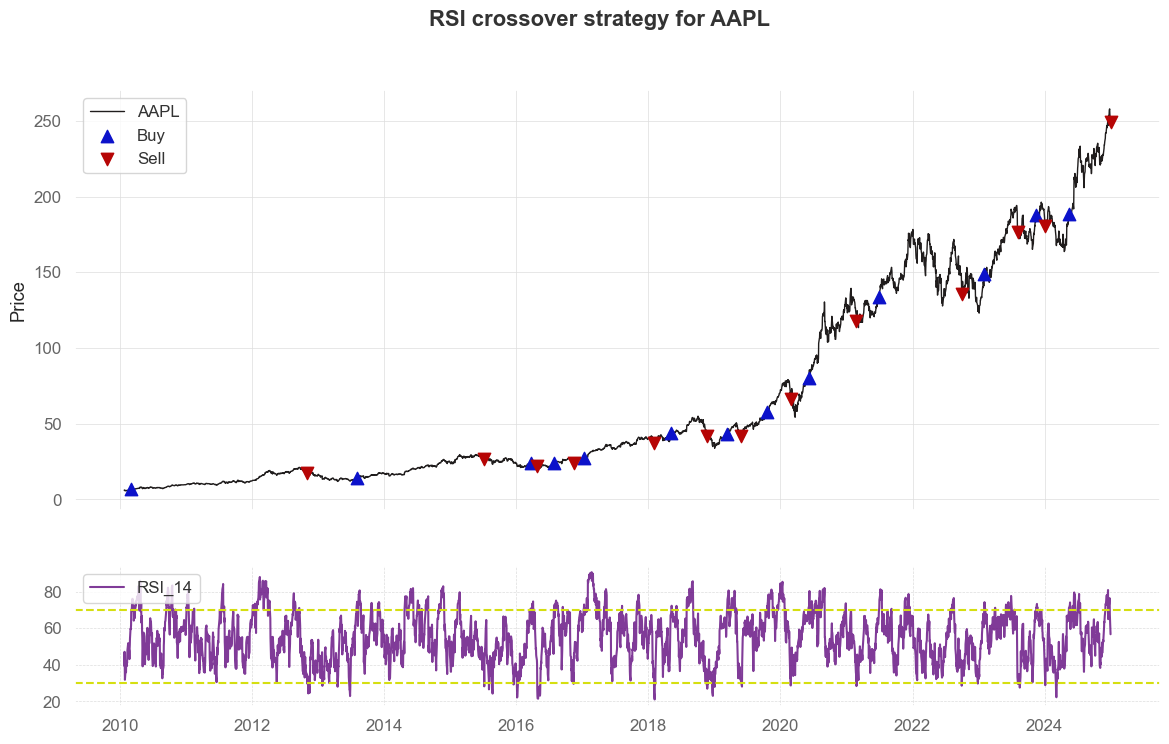

In [30]:
visuals_rsi_strat(df, res["eq_curve"])

### **BEST PERFORMING PARAMETERS**

### **MACHINE LEARNING TO PREDICT BUY/SELL**

* Data Handling
* Feature engineering (MA + RSI + rets) -> build X
* Define target variable -> build y
* Train/Test split
* Scale features
* Train XGBoost classifier


Optimization process
* Define hyperparameters grid
* Walk forward validation ? Cross validation causes overfitting
* Select stable parameters (not best in sample)
* Train final model with these parameters